# Beer classification - exploration of classification tools, metrics, and sklearn pipeline

Uses beer profile data from kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import

## Import File

https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set

In [2]:
df = pd.read_csv('/Users/andrewtaylor/Google Drive/11-OMSA/03-MiscProjects/beercharacteristics/beer_profile_and_ratings.csv')

## Record Count and Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [5]:
df.dtypes.value_counts()

int64      14
float64     6
object      5
dtype: int64

# Preliminary Summaries

## Column Summaries

### Overall

In [6]:
df.isna().sum()

Name                 0
Style                0
Brewery              0
Beer Name (Full)     0
Description          0
ABV                  0
Min IBU              0
Max IBU              0
Astringency          0
Body                 0
Alcohol              0
Bitter               0
Sweet                0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
dtype: int64

In [7]:
df.nunique()

Name                 3066
Style                 111
Brewery               934
Beer Name (Full)     3197
Description          1841
ABV                   194
Min IBU                21
Max IBU                25
Astringency            66
Body                  149
Alcohol               104
Bitter                133
Sweet                 183
Sour                  192
Salty                  21
Fruits                149
Hoppy                 153
Spices                138
Malty                 196
review_aroma         2326
review_appearance    2257
review_palate        2324
review_taste         2356
review_overall       2325
number_of_reviews     811
dtype: int64

### Numerical Columns

In [8]:
df.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000
max,57.500000,65.000000,100.000000,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,5.000000,4.666667,5.000000,5.000000,5.000000,3290.000000


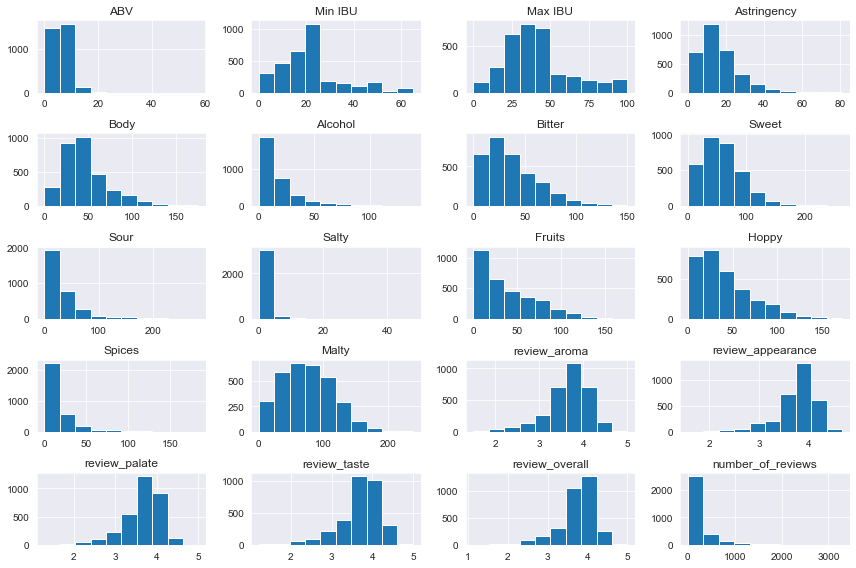

In [9]:
axes = df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

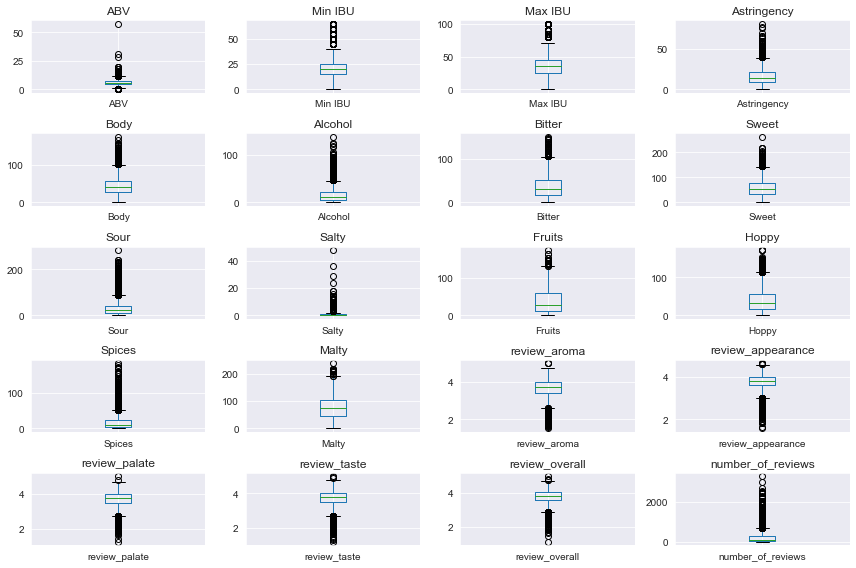

In [9]:
fig, ax = plt.subplots(5, 4, figsize=(12, 8))

for ind, col in enumerate(df.select_dtypes(exclude='object').columns):
    df.boxplot(column=col, ax=ax[ind // 4, ind%4])
    ax[ind // 4, ind%4].set_title(col)

plt.tight_layout()

### Categorical Summaries

In [11]:
df['Style'].value_counts()

Lager - Adjunct                    45
Lager - European Pale              43
Wheat Beer - Hefeweizen            42
Stout - Irish Dry                  42
Lambic - Fruit                     42
                                   ..
Bière de Champagne / Bière Brut     8
Lager - India Pale Lager (IPL)      6
IPA - New England                   4
Sour - Gose                         3
Brett Beer                          3
Name: Style, Length: 111, dtype: int64

# Transform

## Rename to lowercase, no spaces

In [12]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("[()]", "")
df.columns

Index(['name', 'style', 'brewery', 'beer_name_full', 'description', 'abv',
       'min_ibu', 'max_ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

## Create l1/l2 categories

In [13]:
df[['style_l1', 'style_l2']] = pd.DataFrame(df['style'].str.split(" - ").tolist(), columns=['style_l1', 'style_l2'])

In [14]:
df.nunique()

name                 3066
style                 111
brewery               934
beer_name_full       3197
description          1841
abv                   194
min_ibu                21
max_ibu                25
astringency            66
body                  149
alcohol               104
bitter                133
sweet                 183
sour                  192
salty                  21
fruits                149
hoppy                 153
spices                138
malty                 196
review_aroma         2326
review_appearance    2257
review_palate        2324
review_taste         2356
review_overall       2325
number_of_reviews     811
style_l1               43
style_l2               63
dtype: int64

In [15]:
df['style_l1'].value_counts()

Lager                              567
Stout                              254
Wheat Beer                         206
Porter                             164
IPA                                163
Bock                               155
Strong Ale                         148
Lambic                             100
Pale Ale                            98
Brown Ale                           94
Red Ale                             90
Pilsner                             86
Bitter                              74
Farmhouse Ale                       72
Blonde Ale                          64
Barleywine                          64
Sour                                57
Mild Ale                            47
Dubbel                              41
Winter Warmer                       40
Altbier                             39
Fruit and Field Beer                37
Rye Beer                            37
Tripel                              37
Scotch Ale / Wee Heavy              35
Quadrupel (Quad)         

## Slim down / remove 'meta' columns

In [16]:
df_meta = df[['name', 'brewery', 'beer_name_full', 'description', 'style', 'style_l2', 'review_aroma', 'review_taste', 'review_appearance', 'review_palate', 'review_overall', 'number_of_reviews']]
df = df.drop(['name', 'brewery', 'beer_name_full', 'description', 'style', 'style_l2', 'review_aroma', 'review_taste', 'review_appearance', 'review_palate', 'review_overall', 'number_of_reviews'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abv          3197 non-null   float64
 1   min_ibu      3197 non-null   int64  
 2   max_ibu      3197 non-null   int64  
 3   astringency  3197 non-null   int64  
 4   body         3197 non-null   int64  
 5   alcohol      3197 non-null   int64  
 6   bitter       3197 non-null   int64  
 7   sweet        3197 non-null   int64  
 8   sour         3197 non-null   int64  
 9   salty        3197 non-null   int64  
 10  fruits       3197 non-null   int64  
 11  hoppy        3197 non-null   int64  
 12  spices       3197 non-null   int64  
 13  malty        3197 non-null   int64  
 14  style_l1     3197 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 374.8+ KB


In [17]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3197 non-null   object 
 1   brewery            3197 non-null   object 
 2   beer_name_full     3197 non-null   object 
 3   description        3197 non-null   object 
 4   style              3197 non-null   object 
 5   style_l2           2519 non-null   object 
 6   review_aroma       3197 non-null   float64
 7   review_taste       3197 non-null   float64
 8   review_appearance  3197 non-null   float64
 9   review_palate      3197 non-null   float64
 10  review_overall     3197 non-null   float64
 11  number_of_reviews  3197 non-null   int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 299.8+ KB


## Remove low count categories

In [18]:
df = df[~df['style_l1'].isin(df['style_l1'].value_counts()[df['style_l1'].value_counts() <= 15].index.tolist())]

## Remove outliers

In [19]:
df[df['abv'] > 20].join(df_meta)

,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,...,beer_name_full,description,style,style_l2,review_aroma,review_taste,review_appearance,review_palate,review_overall,number_of_reviews
297,30.86,25,35,4,5,14,2,16,6,0,...,Schorschbräu Schorschbock 31%,Notes:,Bock - Eisbock,Eisbock,4.000000,4.500000,4.000000,4.000000,3.500000,1
299,57.50,25,35,0,7,17,3,9,6,0,...,Schorschbräu Schorschbock 57%,Notes:,Bock - Eisbock,Eisbock,4.000000,3.500000,4.000000,4.000000,4.000000,1
2746,28.00,40,100,8,44,64,30,108,18,0,...,Boston Beer Company (Samuel Adams) Samuel Adam...,Notes:Truly the epitome of brewing's two thous...,Strong Ale - American,American,4.453521,4.467606,4.198592,4.246479,4.066197,355


In [20]:
df = df[df['abv'] < 30]

# EDA

## Correlation

In [21]:
corr = df.corr()

<AxesSubplot:>

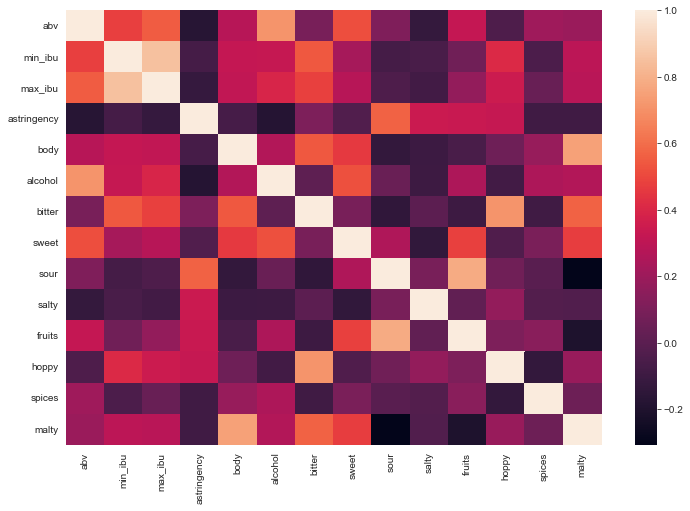

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

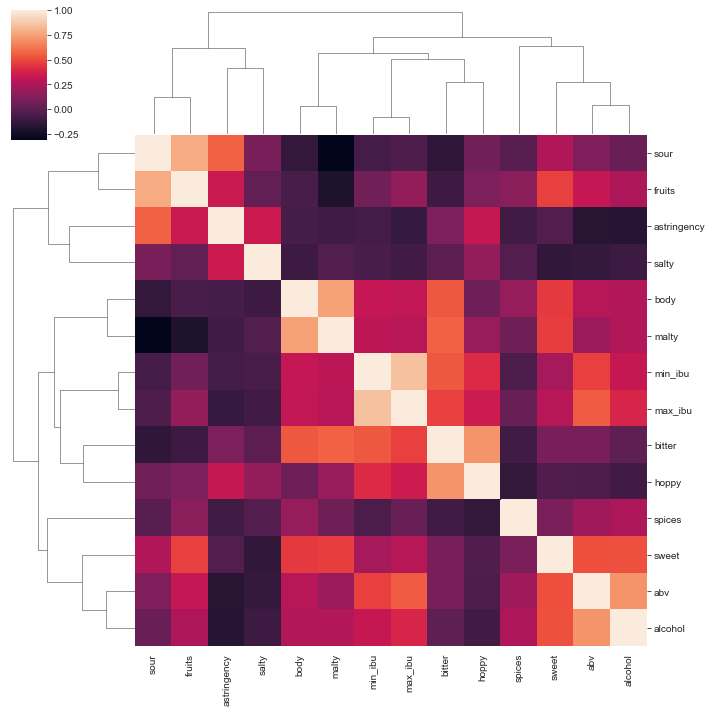

In [23]:
sns.clustermap(corr)

## Boxplots

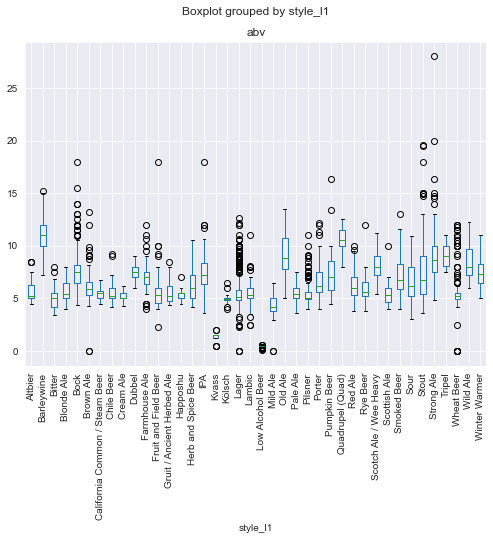

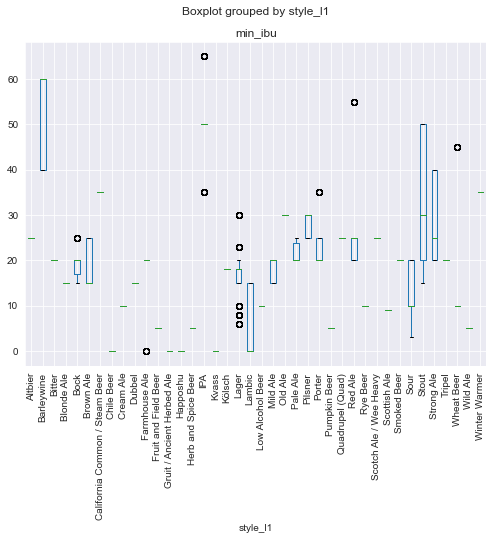

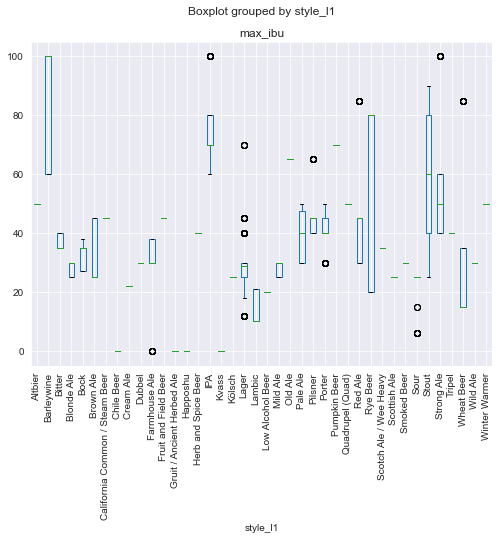

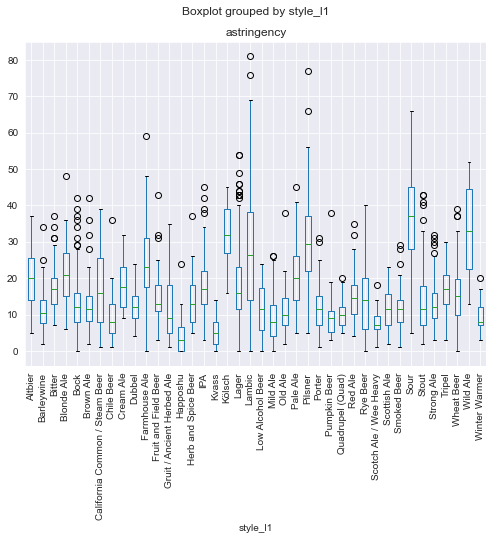

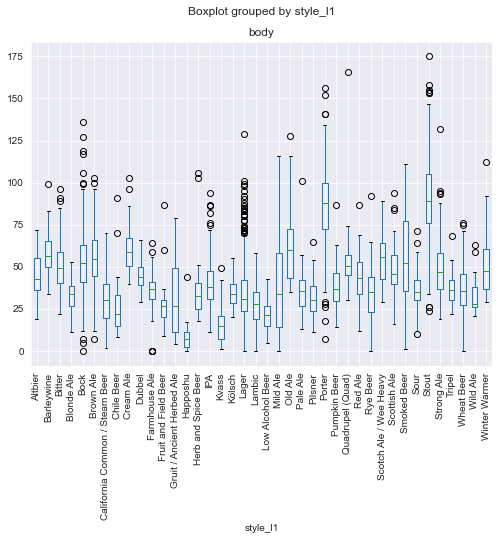

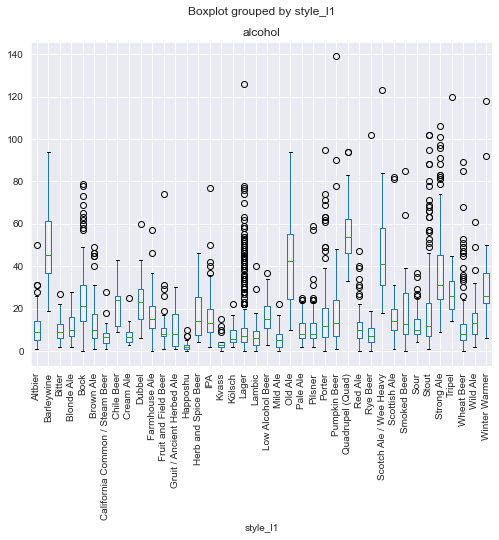

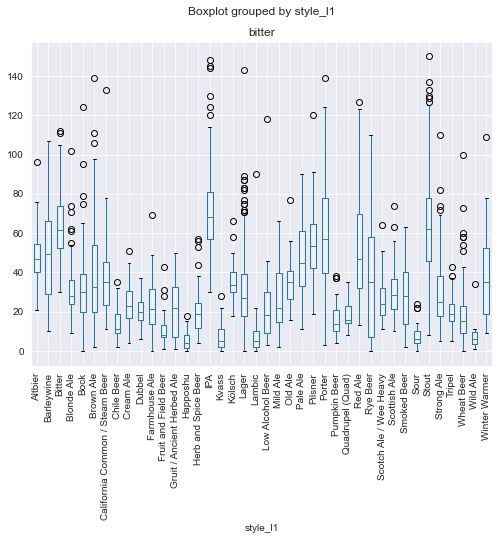

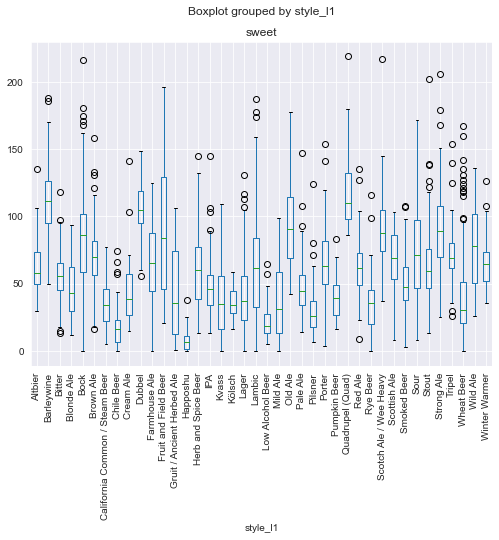

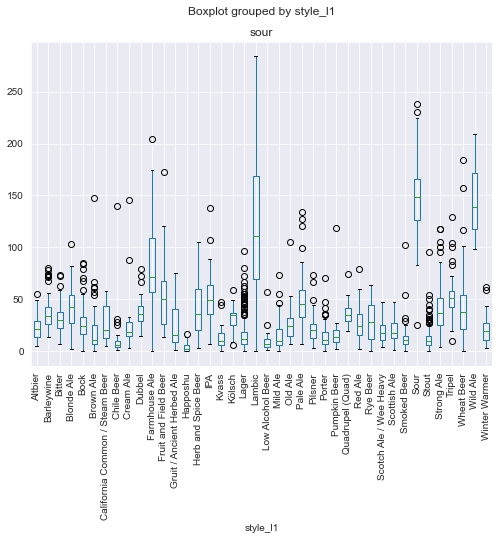

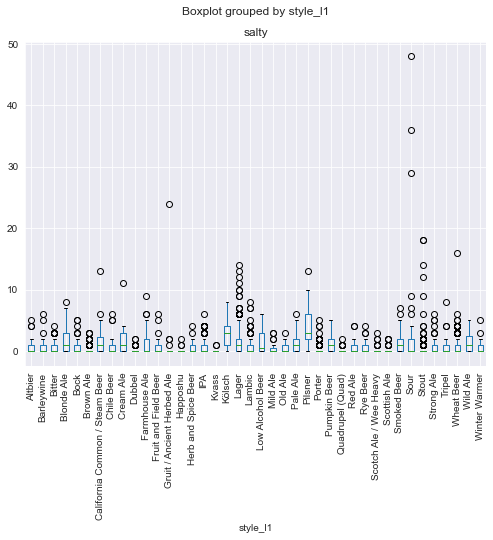

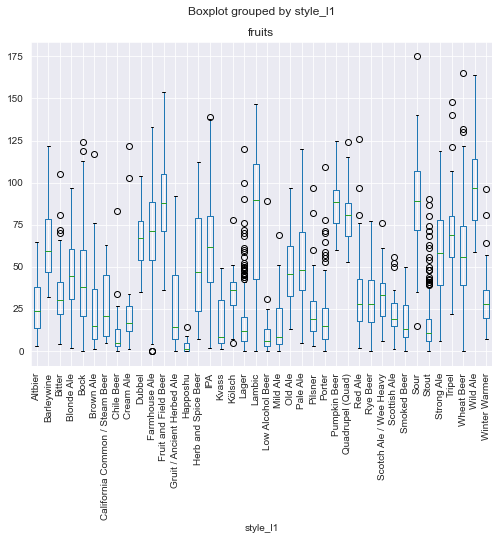

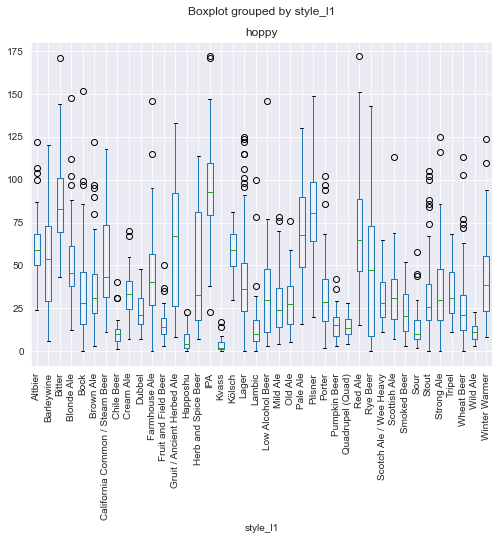

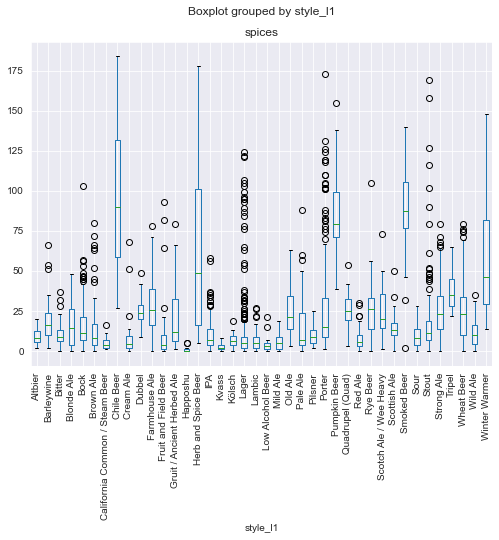

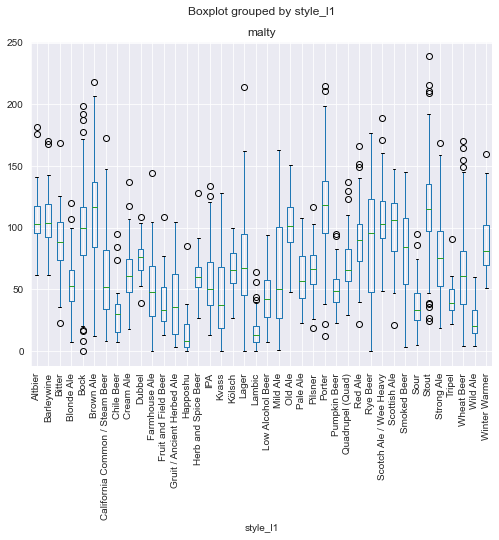

In [24]:
for col in df.select_dtypes(exclude='object'):
    df.boxplot(column=col, by='style_l1', rot=90, figsize=(8, 6))

### Transform the response

In [27]:
df['style_l1'] = df['style_l1'].astype("category")

In [29]:
X = df.drop('style_l1', axis=1).to_numpy().copy()
X_names = df.drop('style_l1', axis=1).columns
y = df['style_l1'].cat.codes.to_numpy().copy()
y[y != 15] = 0
y[y == 15] = 1

In [30]:
X.shape

(3170, 14)

In [31]:
y.shape

(3170,)


---

## Visualization of Classes

---

## PCA & Visualization

---

## Model Selection


### Train Test Split
For all model types, we'll use nested cross-validation to evaluate the best parameters (inner loop) then come up with a less biased score for model selection (outer loop). We could certainly do this with a traditional train-test-validation or train+cv-validation set, but with this few samples, I'd rather keep the training and test sets as large as possible. Within some model types, we'll also use scikit-learn's `Pipeline` to perform any needed preprocessing and feature selection.

### Logistic Regression

Pipeline & Model Fit
1. Multicollinearity - SelectKBest or PCA
2. Scaling - StandardScaler
3. Class encoding - RESEARCH
4. Fit
    * Regularization parameter
    * Research

Output Storage

### K-Nearest Neighbors

Pipeline
1. Multicollinearity - RESEARCH
2. Scaling - StandardScaler
3. Class encoding - RESEARCH
4. Fit
    * Distance measure
    * Number of neighbors

Output Storage

### SVC

Pipeline
1. Multicollinearity - RESEARCH
2. Scaling - StandardScaler
3. Class encoding - RESEARCH
4. Fit
    * Kernel

Output Storage

### HGBT

Pipeline
1. Multicollinearity - RESEARCH (Maybe multiple options)
2. Class encoding - RESEARCH
3. Fit
    * Estimators
    * Depth
    * RESEARCH

Output Storage

### Random Forest

Pipeline
1. Multicollinearity - RESEARCH (Maybe multiple options)
2. Class encoding - RESEARCH
3. Fit
    * Estimators
    * Depth
    * RESEARCH

Output Storage

### Dummy Classifier

Pipeline

Output Storage

Output Comparison
* What model performed the best on which measures?
* What model do we move forward with?
* Decision Boundary graph

## Final Model Deep-Dive

### Initial Output View

* Any issues with the imbalanced classes?
* Anything we want to address or add to the tuning loop? Should we fine-tune?

### Hyperparameter Tuning

* Run more fine-tuned inner+outer loop on final model family (to be able to compare still)
* Train on full train dataset & evaluate final performance on test set